In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, Y_train, Y_test = train_test_split(x,y,stratify=y,random_state=42)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_train=pd.DataFrame(X_train,columns=["feature1","feature2"])
df_test=pd.DataFrame(X_test,columns=["feature1","feature2"])
df_train['output']=Y_train
df_test['output']=Y_test

In [4]:
df_train.head()

,feature1,feature2,output
0,0.452671,-1.423813,0
1,0.616964,-0.004190,0
2,-1.807080,-1.344996,1
3,-0.325957,-0.394067,1
4,-0.400938,-0.414505,1


In [5]:
df_test.head()

,feature1,feature2,output
0,1.561438,-0.186301,0
1,-0.197549,-0.297955,1
2,0.863781,-2.178567,0
3,-0.683693,-0.475869,1
4,-2.156478,-1.561213,1


In [6]:
from sklearn.metrics import accuracy_score

In [7]:
from sklearn.neighbors import KNeighborsClassifier
neigh=KNeighborsClassifier()

In [53]:

import random
def RandomSearchCV(fold):
    param=set()
    n=int(len(X_train)/fold)
    count=0
    while(count!=15):
        x=int(random.uniform(0,50))
        param.add(x)  
        count=len(list(param))
        param=set(param)
        
      
    param=sorted(list(param))
    train_score=list()
    test_score=list()
    
    
    for i in param:
        train_fold=[]
        test_fold=[]
        
        for j in range(fold):
            x=int(random.uniform(1,35))
            indices=[l for l in range(len(X_train))]
            test_indices=[l for l in range(j*n,j*n+n)]
            train_indices=list(set(indices)-set(test_indices))
            x_train=X_train[train_indices]
            x_test=X_train[test_indices]
            y_train=Y_train[train_indices]
            y_test=Y_train[test_indices]
            neigh.n_neighbors=i
            neigh.fit(x_train,y_train)
            y_predict=neigh.predict(x_test)
            test_fold.append(accuracy_score(y_test,y_predict))
            y_predict=neigh.predict(x_train)
            train_fold.append(accuracy_score(y_train,y_predict))
        avg=np.mean(test_fold)
        test_score.append(avg)
        avg=np.mean(train_fold)
        train_score.append(avg)
    #print(train_score)
    #print(test_score)
    return param,train_score,test_score
    
            
        

In [54]:
import warnings
warnings.filterwarnings("ignore")
fold=3
param,train_score,test_score=RandomSearchCV(fold)

In [55]:
print(train_score)

[0.9624666666666667, 0.9611333333333333, 0.9596666666666667, 0.9592, 0.9589333333333334, 0.9575999999999999, 0.9574666666666666, 0.9579333333333334, 0.9576666666666666, 0.9578666666666665, 0.9582666666666667, 0.9584, 0.9578000000000001, 0.9579999999999999, 0.9581333333333334]


In [56]:
print(test_score)

[0.9505333333333335, 0.9510666666666667, 0.9540000000000001, 0.9544, 0.9540000000000001, 0.9546666666666667, 0.9553333333333334, 0.9561333333333333, 0.9553333333333334, 0.9558666666666666, 0.9558666666666666, 0.9562666666666667, 0.9565333333333333, 0.9565333333333333, 0.9558666666666666]


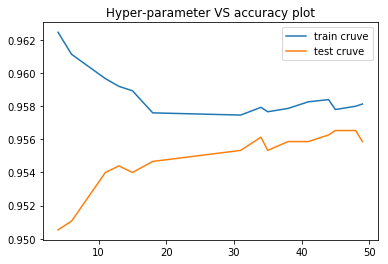

In [57]:
plt.plot(param,train_score, label='train cruve')
plt.plot(param,test_score, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()

In [58]:
index=test_score.index(max(test_score))

In [59]:
best_k=param[index]
print(index)

12


In [60]:
print(best_k)

45


In [61]:
print(param)

[4, 6, 11, 13, 15, 18, 31, 34, 35, 38, 41, 44, 45, 48, 49]


In [62]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

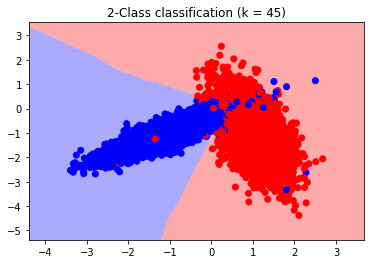

In [64]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = best_k)
neigh.fit(X_train, Y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], Y_train, neigh)